In [1]:
%load_ext autoreload
%autoreload 2
# %cd /p/mmcardiac/Jerry/code/CINE-DENSE-Translation
%cd /home/jx8fh/Projects/LaMoD
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from modules.data import check_dict

/sfs/gpfs/tardis/home/jx8fh/Projects/LaMoD


In [2]:
strain_prev_filename = '/scratch/jx8fh/2024-04-24-whole-vol-preds-strain-and-errors.npy'
strain_prev_data = np.load(strain_prev_filename, allow_pickle=True).tolist()
check_dict(strain_prev_data)

MotionDecoder1x1                                             dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
UNetROri                                                     dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
UNetR1x1                                                     dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
StrainNetOri                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
StrainNet                                                    dict_keys(['strain_img_MSE_errors',

In [3]:
# strain_transUNet_filename = '/p/mmcardiac/Jerry/code/CINE-DENSE-Translation/review/2024-04/2024-04-24-whole-vol-preds/2024-04-24-whole-vol-preds-strain-and-errors.npy'
strain_transUNet_filename = '/scratch/jx8fh/2024-06-22-whole-vol-preds-strain-and-errors-TransUNet.npy'
strain_transUNet_data = np.load(strain_transUNet_filename, allow_pickle=True).tolist()
check_dict(strain_transUNet_data)

TransUNetOri                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
TransUNet1x1                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])


In [4]:
test_GT_data = np.load('/scratch/jx8fh/2024-04-16-test-data.npy', allow_pickle=True).tolist()
check_dict(test_GT_data[0])

patient_id                                                   033                 
DENSE_slice_mat_filename                                     /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-DENSE-data/033_S01_base_auto.1_ROI.1.mat
DENSE_slice_location                                         76.947609505431     
DENSE_frame_time_stamps                                      (51,)               
DENSE_Lag_displacement_field_X                               (48, 48, 51)        
DENSE_Lag_displacement_field_Y                               (48, 48, 51)        
DENSE_myo_masks                                              (48, 48, 51)        
DENSE_myo_mask_bbox                                          (34, 82, 40, 88)    
DENSE_myo_masks_rescaled                                     (128, 128, 51)      
DENSE_n_frames_all                                           51                  
DENSE_frame_indices_with_myo_contour                         (51,)               
out_of_box_flag        

In [19]:
check_data_info = [
    {'idx': 21, 'keyframe': 10},
    {'idx': 23, 'keyframe': 10},
    {'idx': 24, 'keyframe': 10},
    {'idx': 53, 'keyframe': 10},
    {'idx': 57, 'keyframe': 10},
    {'idx': 59, 'keyframe': 10},
    {'idx': 76, 'keyframe': 10},
    {'idx': 79, 'keyframe': 10},
    {'idx': 82, 'keyframe': 10},
    {'idx': 91, 'keyframe': 10},
]

In [7]:
check_dict(test_GT_data[0])

patient_id                                                   033                 
DENSE_slice_mat_filename                                     /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-DENSE-data/033_S01_base_auto.1_ROI.1.mat
DENSE_slice_location                                         76.947609505431     
DENSE_frame_time_stamps                                      (51,)               
DENSE_Lag_displacement_field_X                               (48, 48, 51)        
DENSE_Lag_displacement_field_Y                               (48, 48, 51)        
DENSE_myo_masks                                              (48, 48, 51)        
DENSE_myo_mask_bbox                                          (34, 82, 40, 88)    
DENSE_myo_masks_rescaled                                     (128, 128, 51)      
DENSE_n_frames_all                                           51                  
DENSE_frame_indices_with_myo_contour                         (51,)               
out_of_box_flag        

In [8]:
check_dict(strain_prev_data['MotionDecoder1x1'])

strain_img_MSE_errors                                        list: (102)         
strain_img_L1_errors                                         list: (102)         
strain_mat_MSE_errors                                        list: (102)         
strain_mat_L1_errors                                         list: (102)         
DENSE_strain_CC_pred                                         list: (102)         
DENSE_strain_segmental_pred                                  list: (102)         


In [13]:
check_dict(strain_prev_data['MotionDecoder1x1']['DENSE_strain_CC_pred'][0])

vertices                                                     None                
faces                                                        None                
orientation                                                  None                
maskimage                                                    None                
XX                                                           (48, 48, 40)        
YY                                                           (48, 48, 40)        
XY                                                           (48, 48, 40)        
YX                                                           (48, 48, 40)        
RR                                                           (48, 48, 40)        
CC                                                           (48, 48, 40)        
RC                                                           (48, 48, 40)        
CR                                                           (48, 48, 40)        
p1              

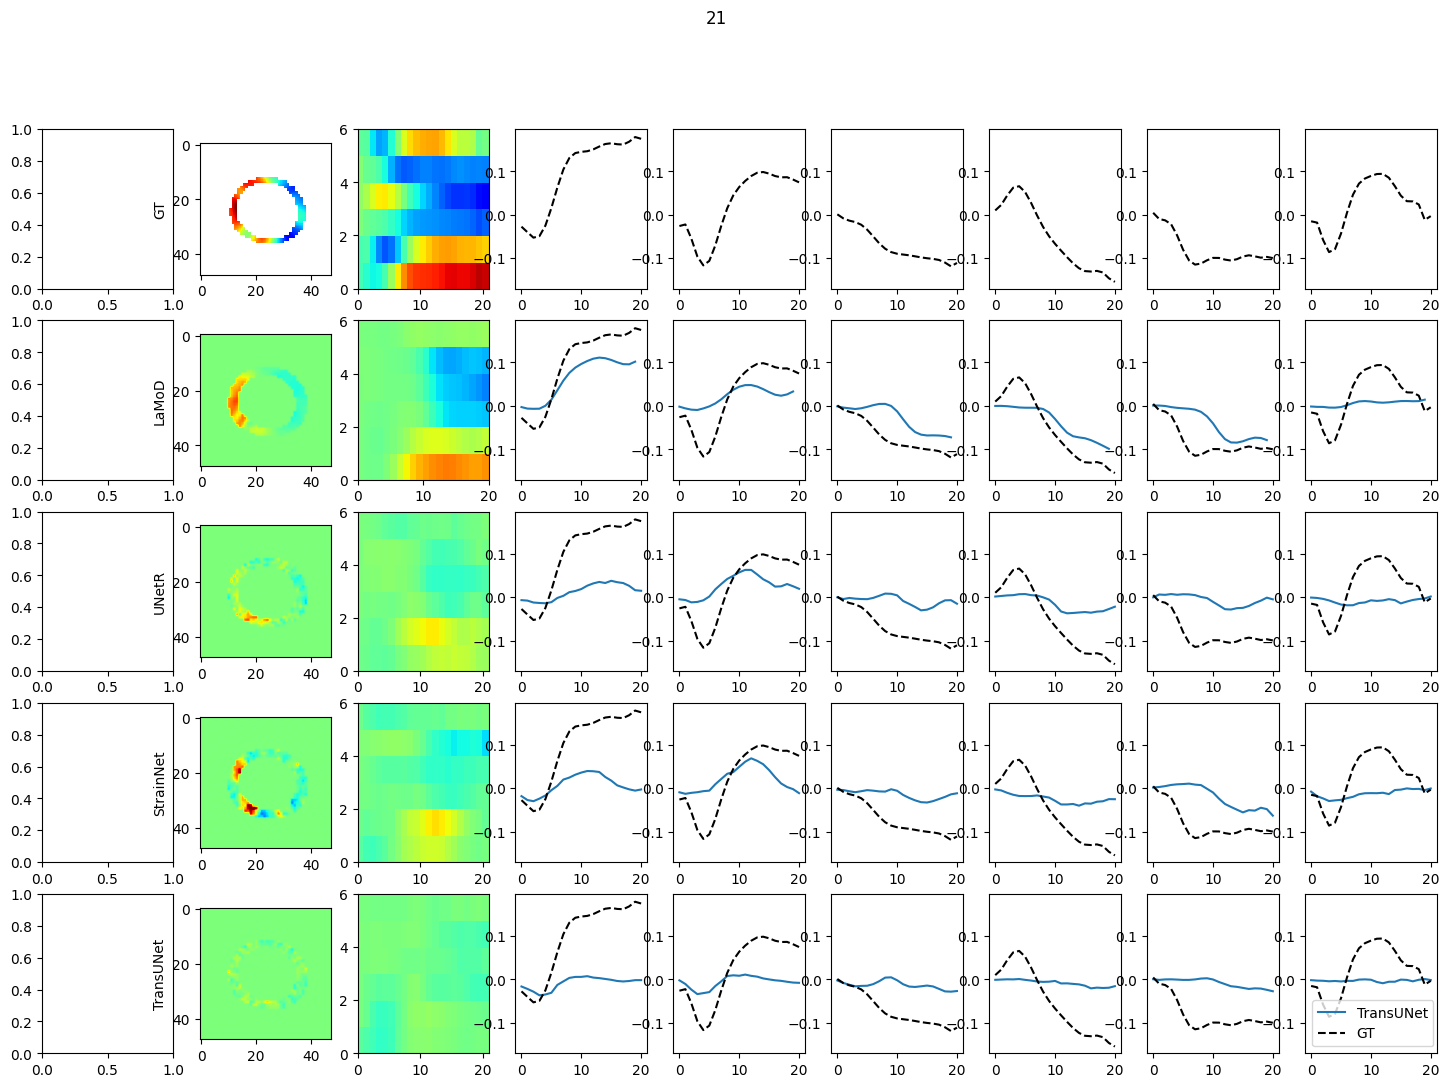

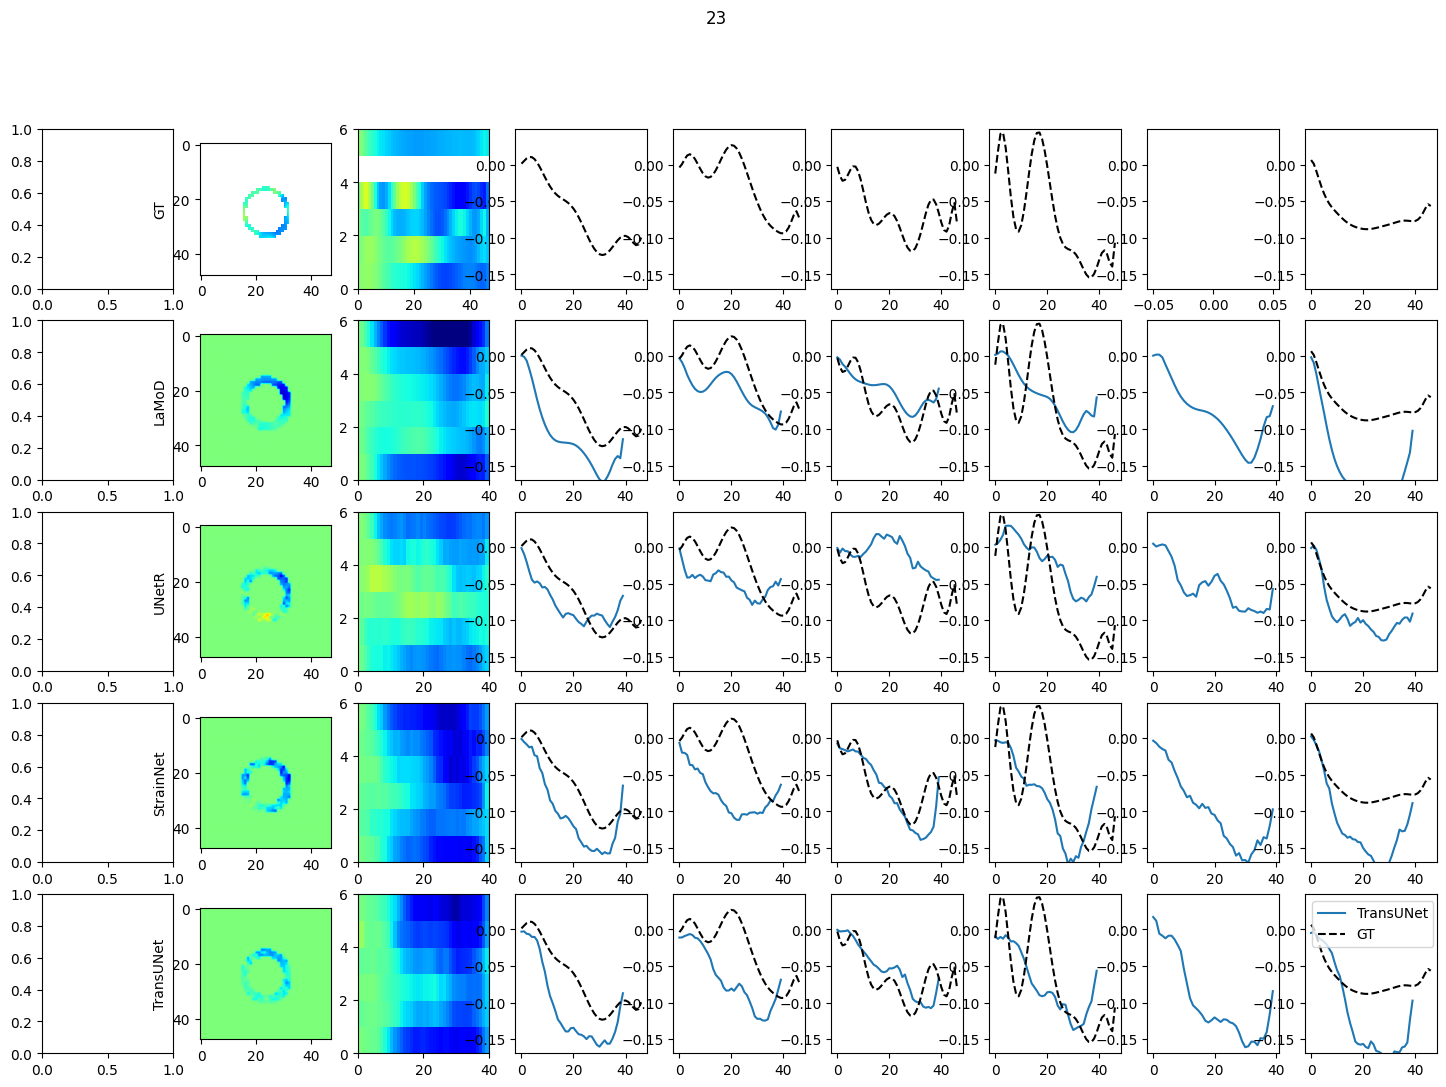

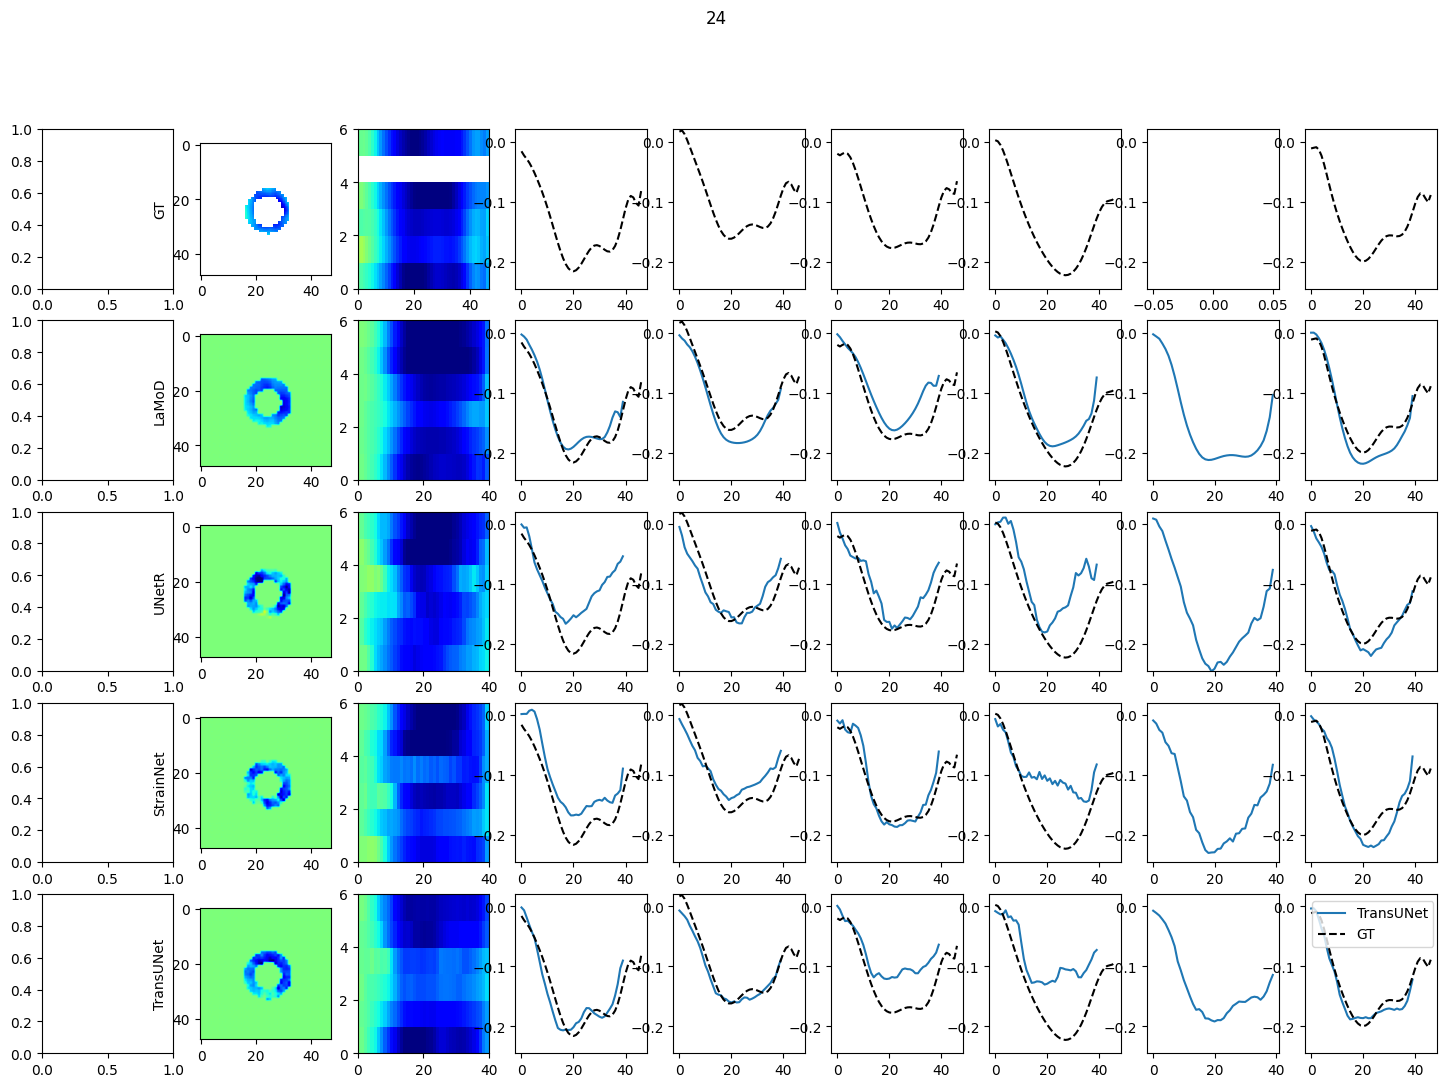

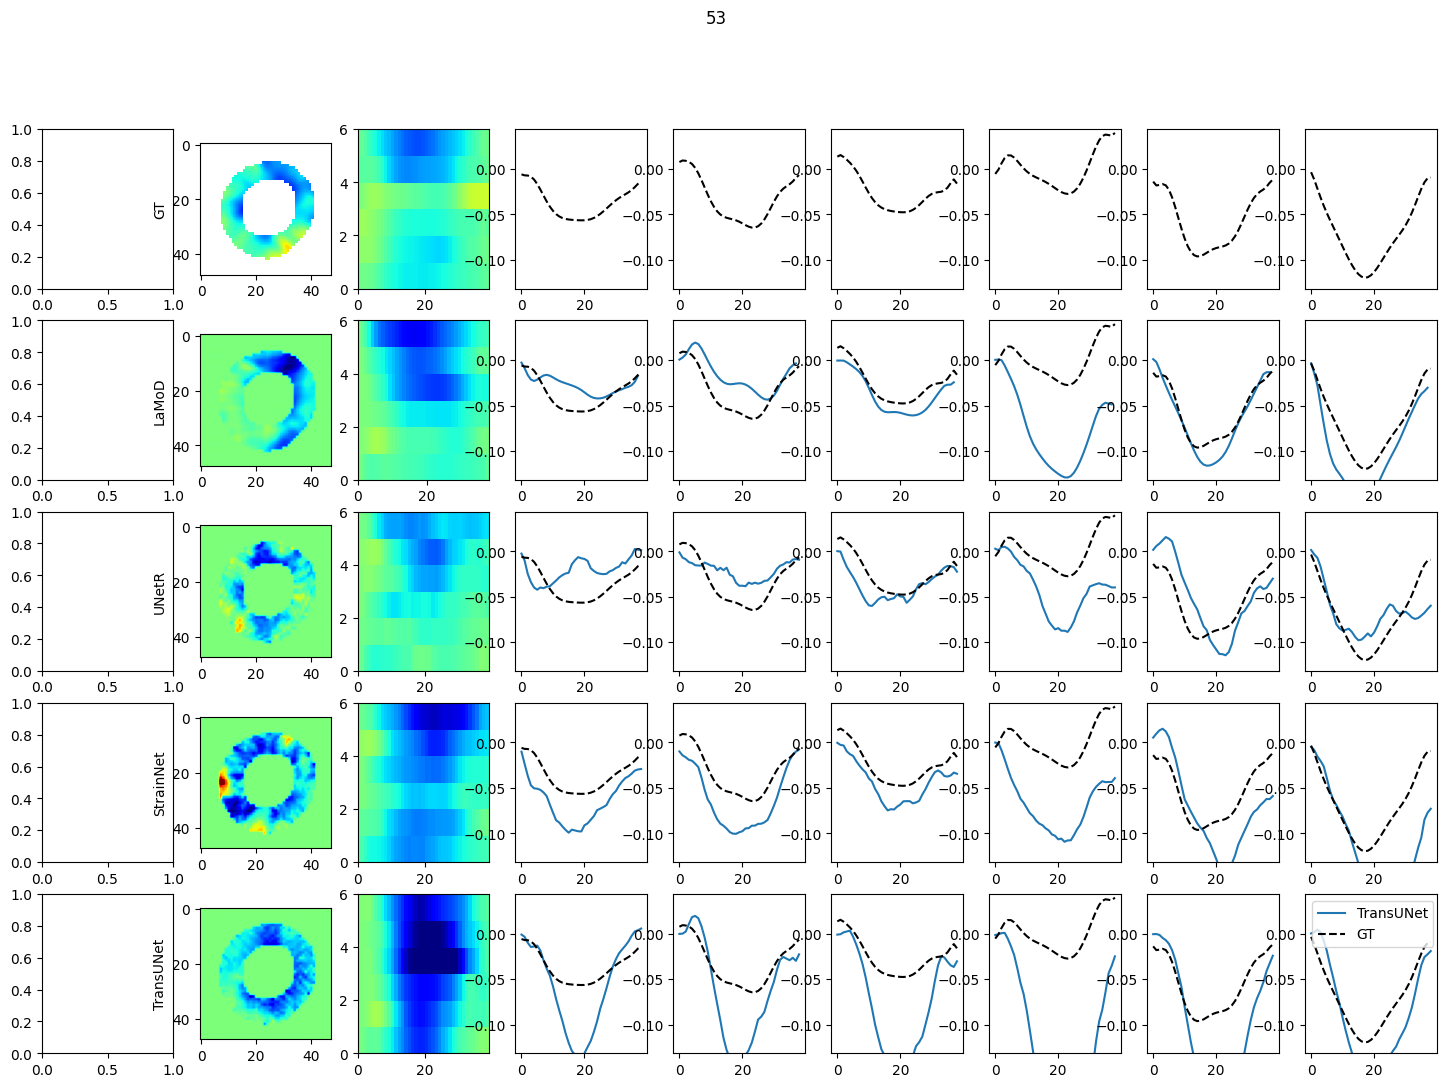

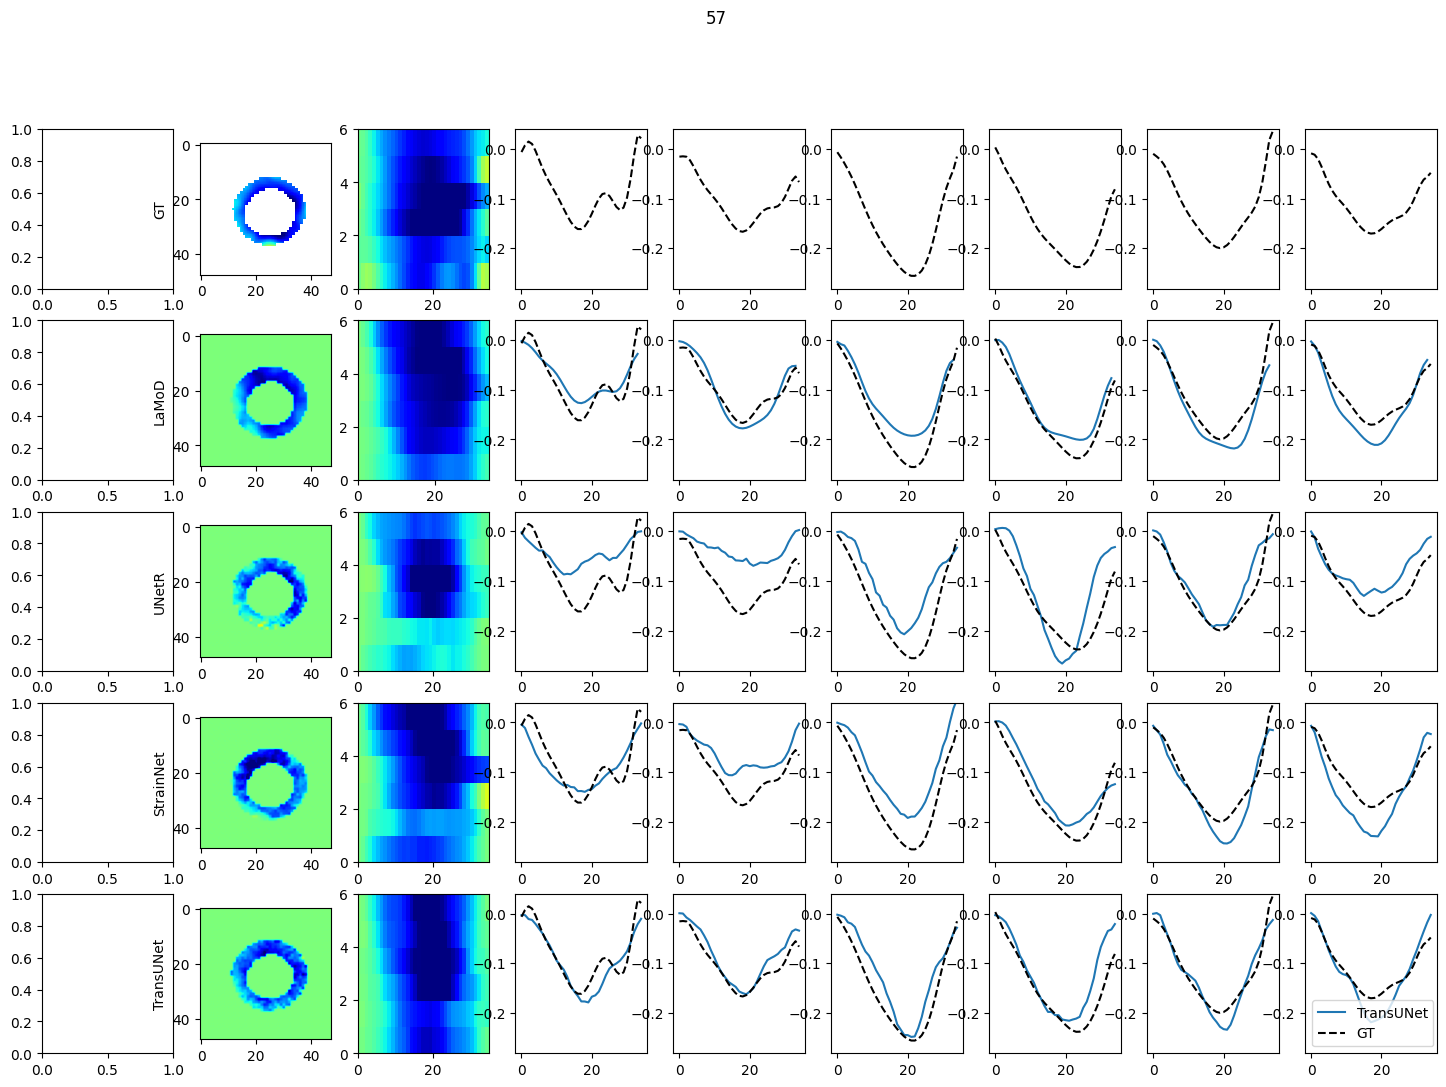

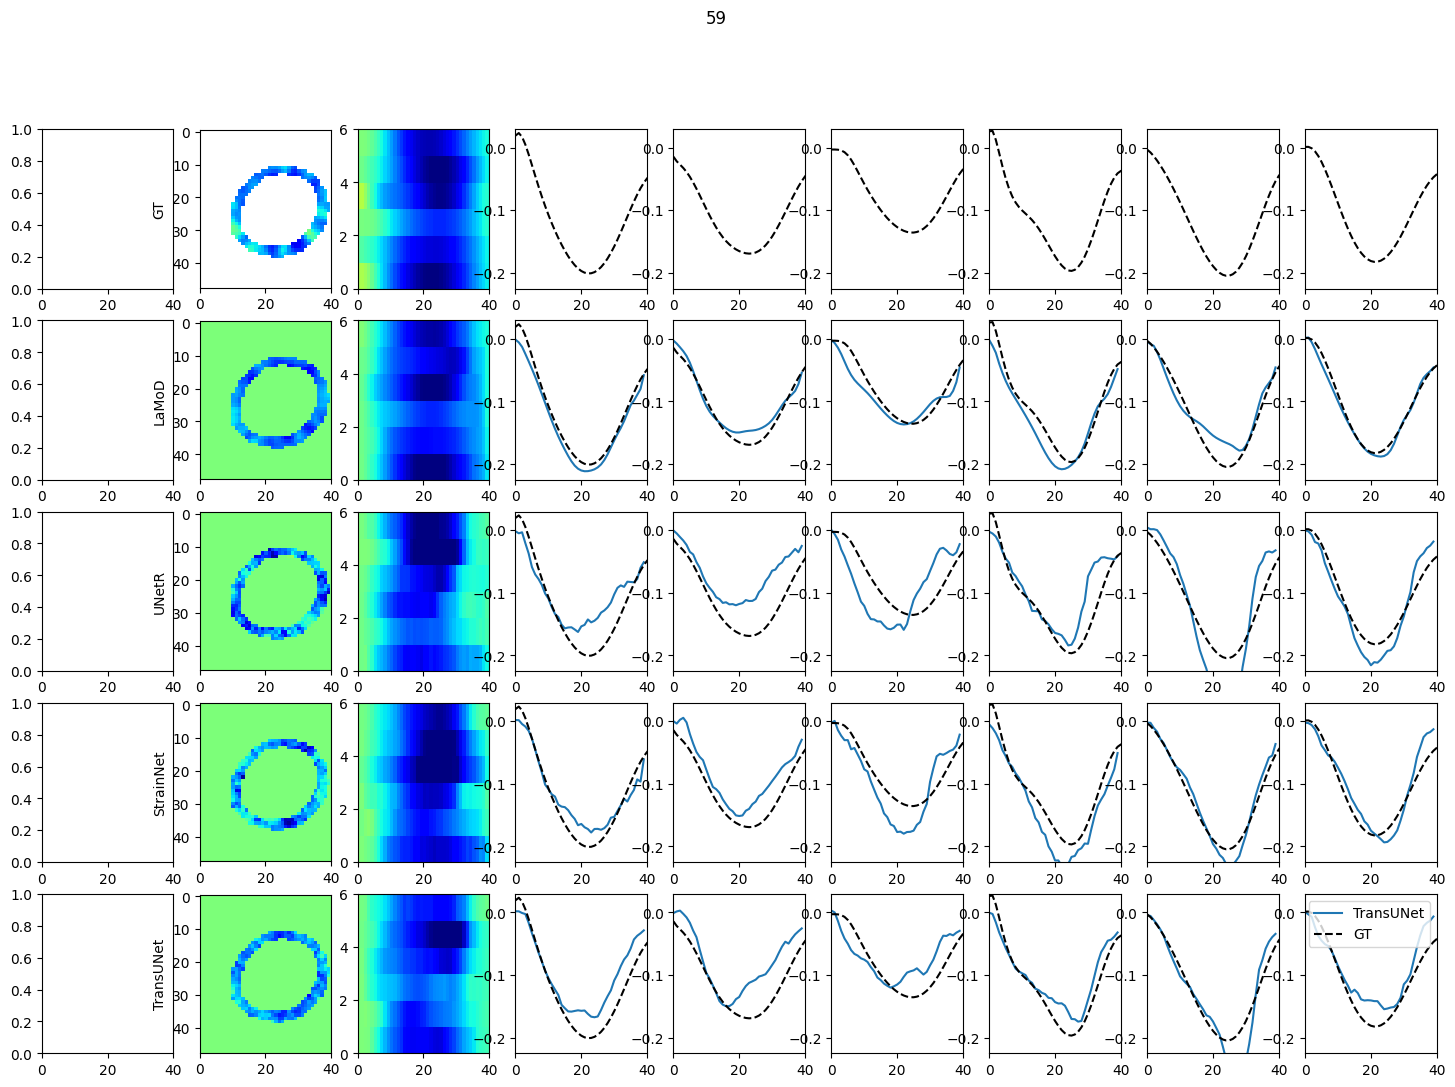

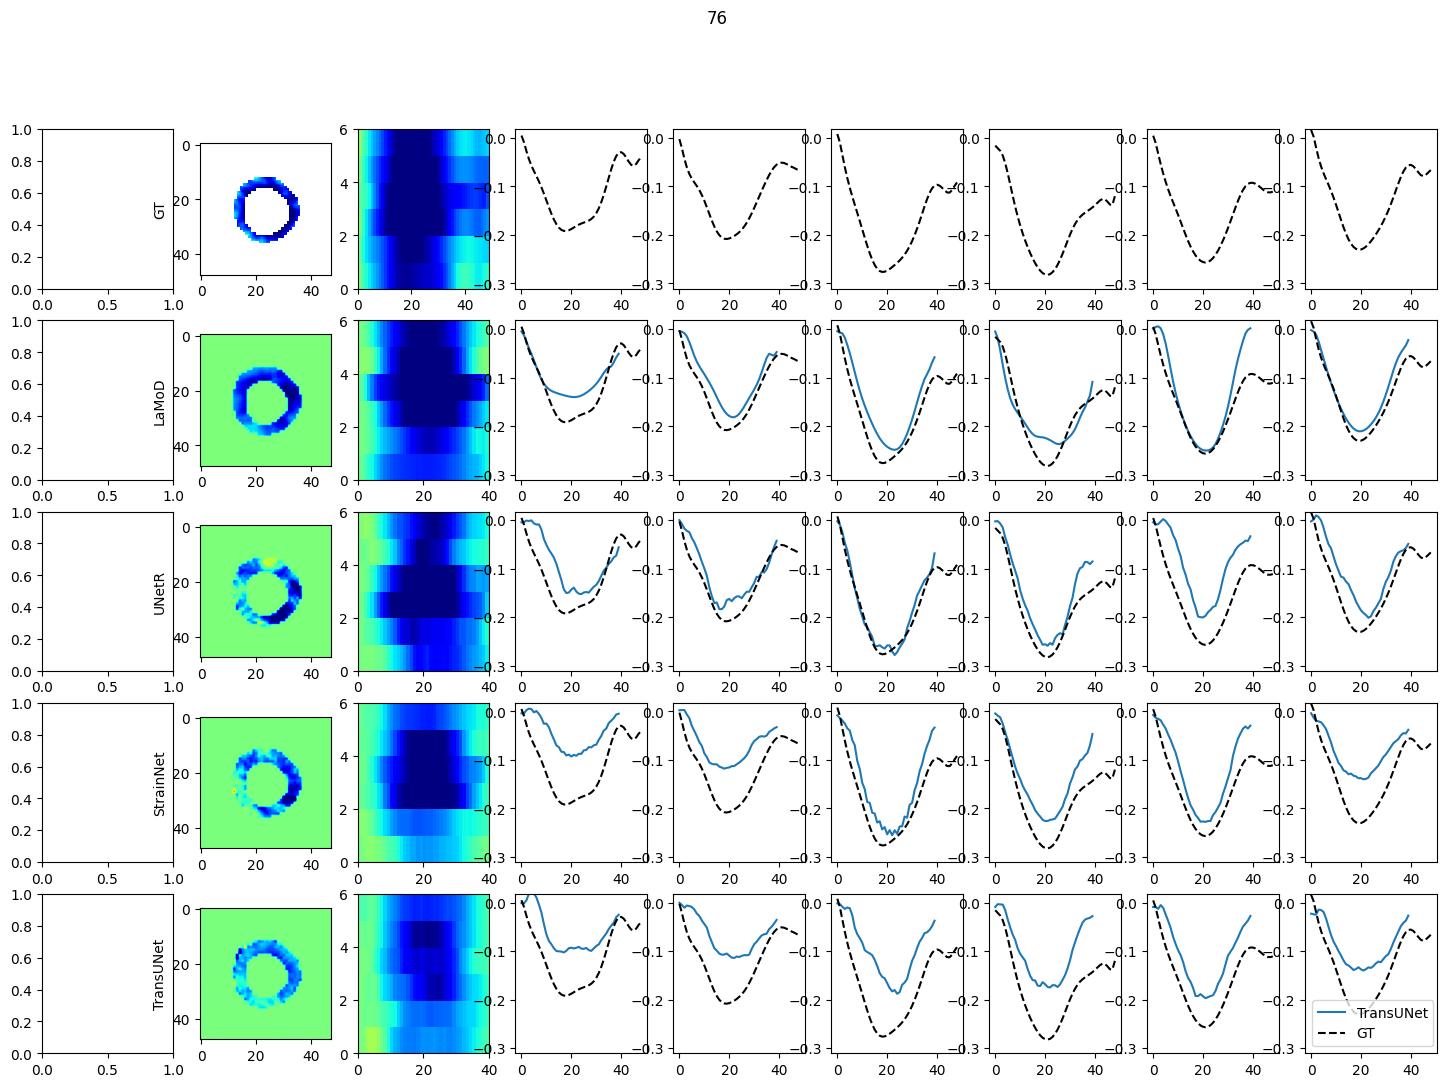

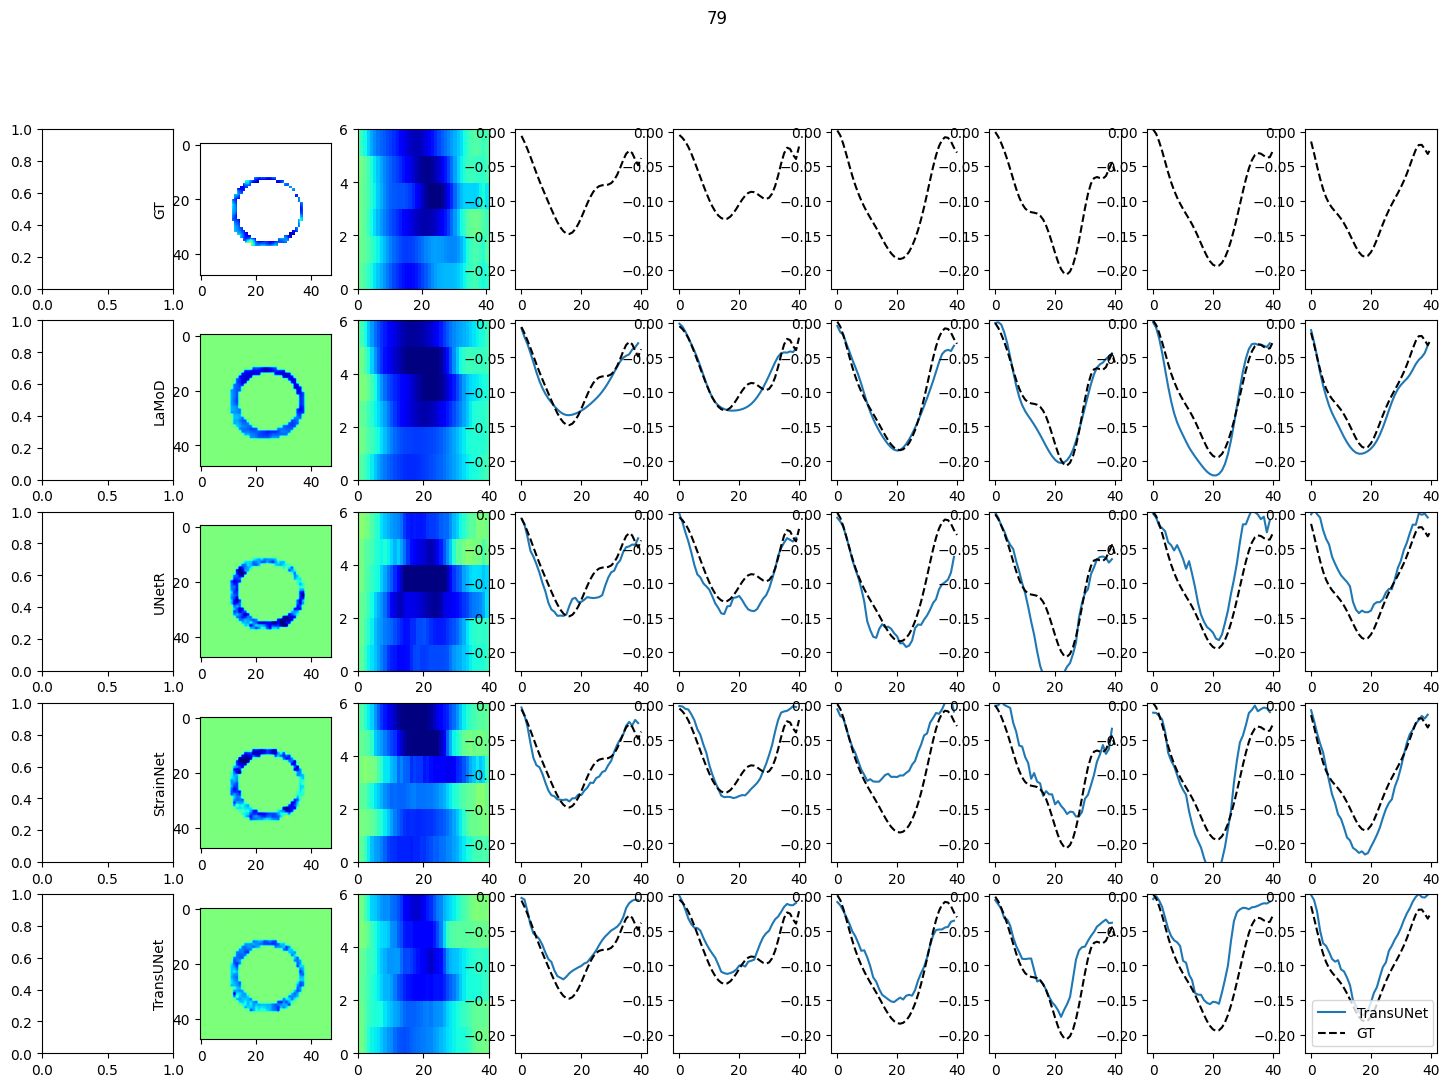

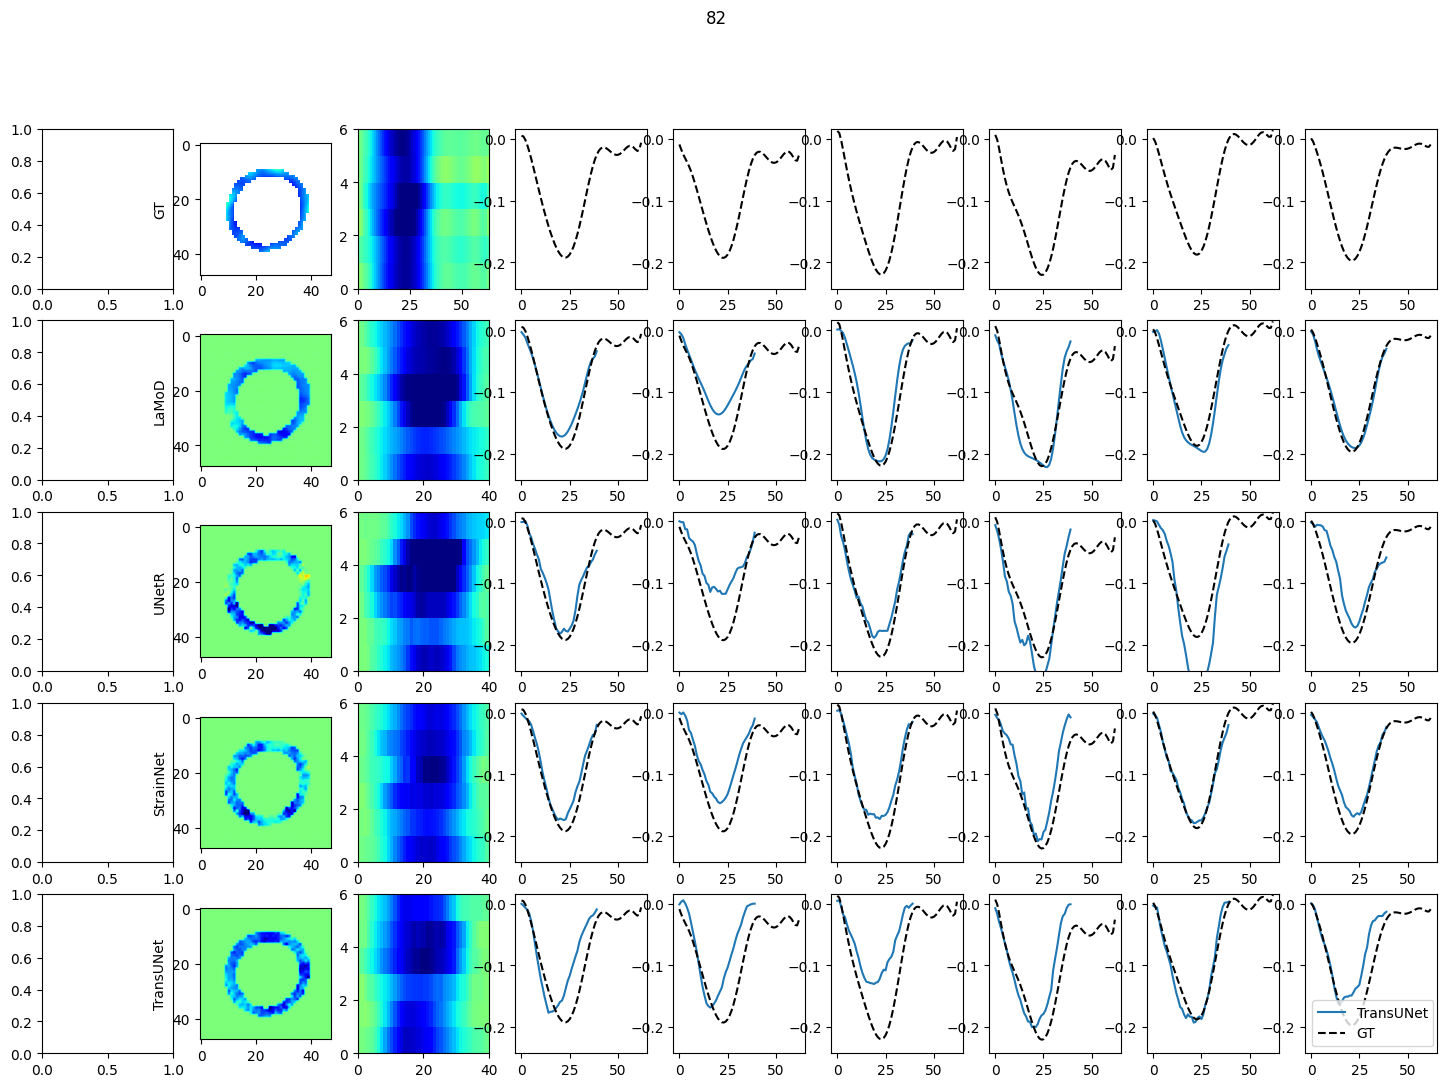

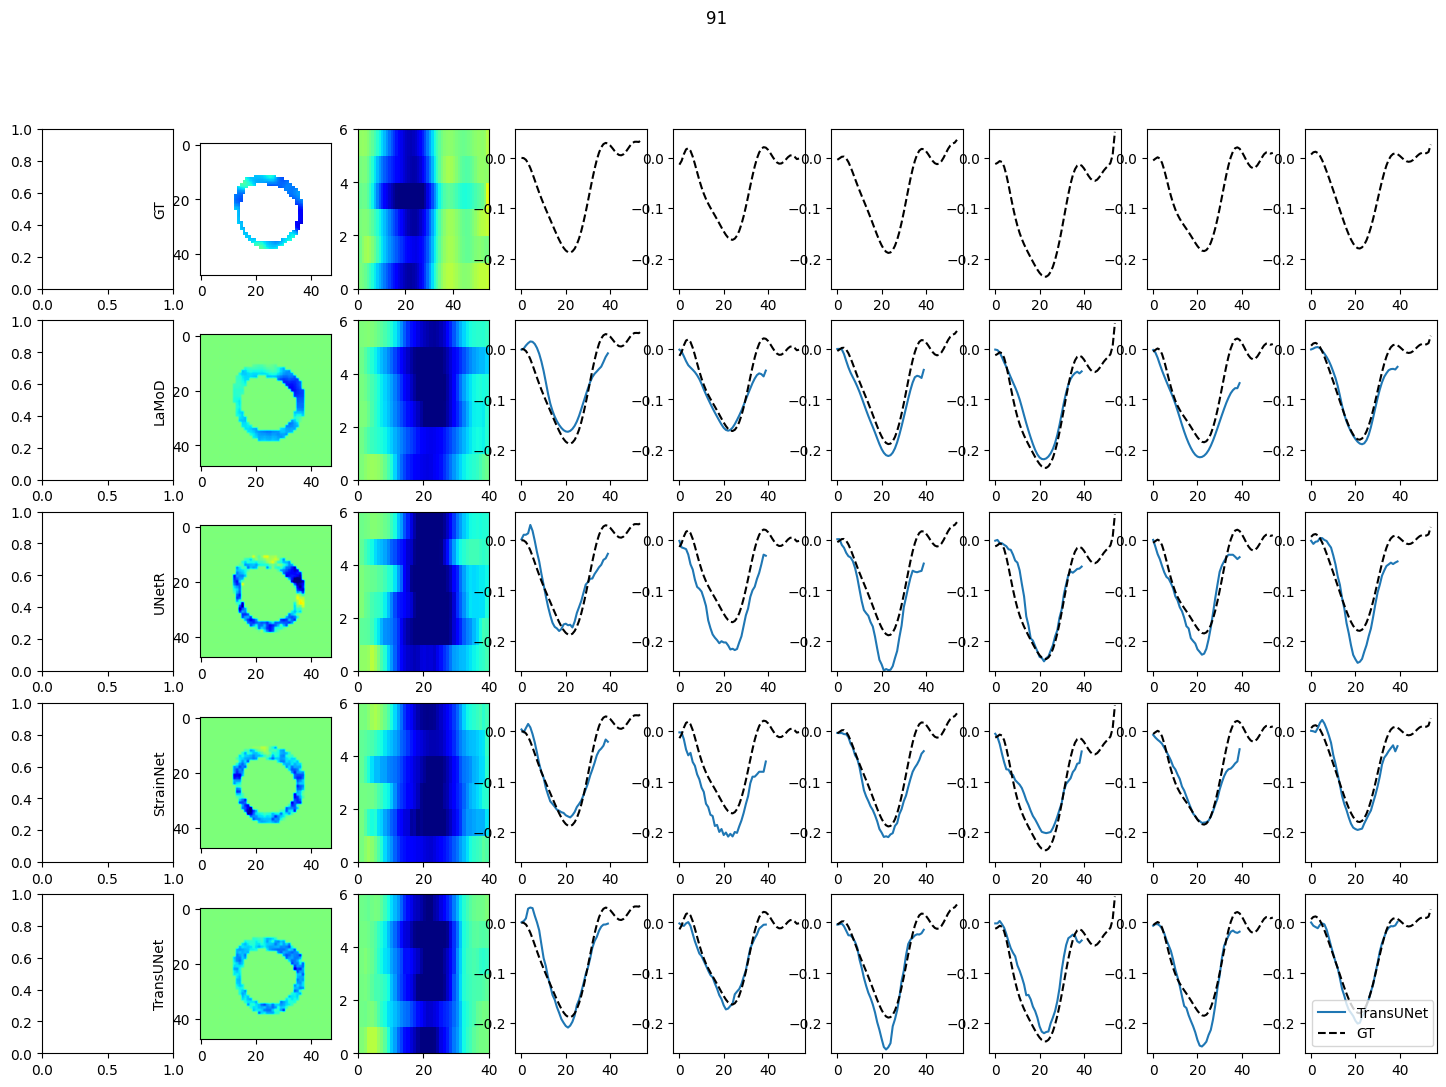

In [36]:
for datum_info in check_data_info:
    datum_idx = datum_info['idx']
    strainmat_GT = test_GT_data[datum_idx]['DENSE_strain_CCs6']
    strainmat_LaMoD = strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'][datum_idx]['CCs6']
    strainmat_UNetR = strain_prev_data['UNetROri']['DENSE_strain_segmental_pred'][datum_idx]['CCs6']
    strainmat_StrainNet = strain_prev_data['StrainNetOri']['DENSE_strain_segmental_pred'][datum_idx]['CCs6']
    strainmat_TransUNet = strain_transUNet_data['TransUNetOri']['DENSE_strain_segmental_pred'][datum_idx]['CCs6']

    strainmat_GT_max = np.max(strainmat_GT[~np.isnan(strainmat_GT)])    
    strainmat_GT_min = np.min(strainmat_GT[~np.isnan(strainmat_GT)])

    # disp_GT_X = test_GT_data[datum_idx]['DENSE_Lag_displacement_field_X']
    # disp_GT_Y = test_GT_data[datum_idx]['DENSE_Lag_displacement_field_Y']
    # disp_MotionDecoder =
    # 
    strain_GT = test_GT_data[datum_idx]['DENSE_strain_CC']
    strain_LaMoD = strain_prev_data['MotionDecoder1x1']['DENSE_strain_CC_pred'][datum_idx]['CC']
    strain_UNetR = strain_prev_data['UNetROri']['DENSE_strain_CC_pred'][datum_idx]['CC']
    strain_StrainNet = strain_prev_data['StrainNetOri']['DENSE_strain_CC_pred'][datum_idx]['CC']
    strain_TransUNet = strain_transUNet_data['TransUNetOri']['DENSE_strain_CC_pred'][datum_idx]['CC']

    datum_key_frame = datum_info['keyframe']
    
    # Make plots
    fig, axs = plt.subplots(5, 9, figsize=(18, 12))
    # Plot displacement fields (skip)

    # Plot strain image
    axs[0, 1].imshow(strain_GT[...,datum_key_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[0, 1].set_ylabel('GT')
    axs[1, 1].imshow(strain_LaMoD[...,datum_key_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[1, 1].set_ylabel('LaMoD')
    axs[2, 1].imshow(strain_UNetR[...,datum_key_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[2, 1].set_ylabel('UNetR')
    axs[3, 1].imshow(strain_StrainNet[...,datum_key_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[3, 1].set_ylabel('StrainNet')
    axs[4, 1].imshow(strain_TransUNet[...,datum_key_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[4, 1].set_ylabel('TransUNet')

    # Plot strain matrix
    axs[0, 2].pcolor(strainmat_GT, cmap='jet', vmin=-0.2, vmax=0.2)
    axs[1, 2].pcolor(strainmat_LaMoD, cmap='jet', vmin=-0.2, vmax=0.2)
    axs[2, 2].pcolor(strainmat_UNetR, cmap='jet', vmin=-0.2, vmax=0.2)
    axs[3, 2].pcolor(strainmat_StrainNet, cmap='jet', vmin=-0.2, vmax=0.2)
    axs[4, 2].pcolor(strainmat_TransUNet, cmap='jet', vmin=-0.2, vmax=0.2)

    # Plot strain curves
    for sector_idx in range(6):
        # axs[0, sector_idx+3].plot(strainmat_GT[sector_idx], label='GT', linestyle='--', color='black')
        axs[1, sector_idx+3].plot(strainmat_LaMoD[sector_idx], label='LaMoD')
        axs[2, sector_idx+3].plot(strainmat_UNetR[sector_idx], label='UNetR')
        axs[3, sector_idx+3].plot(strainmat_StrainNet[sector_idx], label='StrainNet')
        axs[4, sector_idx+3].plot(strainmat_TransUNet[sector_idx], label='TransUNet')
        for row_idx in range(5):
            # axs[row_idx, sector_idx+2].set_xticks([])
            axs[row_idx, sector_idx+3].set_ylim(strainmat_GT_min*1.1, strainmat_GT_max*1.1)
            axs[row_idx, sector_idx+3].plot(strainmat_GT[sector_idx], label='GT', linestyle='--', color='black')
    axs[-1, -1].legend()

    if datum_idx == 59:
        for row_idx in range(5):
            for col_idx in range(9):
                axs[row_idx, col_idx].set_xlim(0, 40)
            # axs[row_idx, 2].set_xlim(0, 40)
        # for col_idx in range(9):
        #     axs[0, col_idx].set_title(f'Frame {col_idx}')

    fig.suptitle(f'{datum_idx}')





In [27]:
np.max(strainmat_GT)

nan

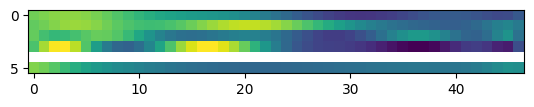

In [29]:
plt.imshow(strainmat_GT)

In [15]:
strain_LaMoD.shape

(48, 48, 20)